<h1><center>Story 2: Narcotics Analysis</center></h1>

In [1]:
#load library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
calls = pd.read_csv('../Data/911_calls_for_service_clean_final.csv',index_col='callDateTime',parse_dates=True)
calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)",39.289930,-76.612346
2015-07-13 10:47:00,Medium,CD,911 NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)",39.290674,-76.607160
2015-07-13 10:42:00,Medium,CD,911 NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)",39.289891,-76.612072
2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)",39.298516,-76.618475
2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)",39.311213,-76.676315


In [12]:
# function to set the label of subplots
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -4), ha='right', va='top', size=14, 
                xycoords='axes fraction', textcoords='offset points') 

# Function to set explode value for pie slice
def isExplode(x):
    if x == True:
        return 0.1
    else:
        return 0
    
# Function to draw pie chart and explode the slice with max size
def DrawPieChart(data, title, savefile = np.nan):
    #convert to dataframe
    data = pd.Series.to_frame(data);
    
    data['Size'] = data / data.sum() * 100
    
    # Create new attribute to set the explode slice
    data['Explode'] = data['Size'].max() == data['Size']    
    data['Explode'] = data['Explode'].apply(isExplode)
    
    fig1, ax1 = plt.subplots(figsize=(15,8))
    ax1.pie(data['Size'], explode = data['Explode'], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(data.index, loc="upper right")
    plt.title(title, fontsize=20)
    plt.tight_layout()
    if (savefile != np.nan):
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()
    
    print(data)
    
def SetChartProperties(ax, xlabel, ylabel, labeltext):
    ax.grid('on', which='minor', axis='x' )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    label(ax, labeltext)

In [4]:
#load narcotics calls
narcotics_calls = calls.loc[calls.description.str.contains('NARCOTICS')==True]
narcotics_calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 10:49:00,Medium,ND,NARCOTICSOUTSIDE,P151941012,W GARRISON AV/PIMLICO RD,"(39.349653,-76.669145)",39.349653,-76.669145
2015-07-13 10:53:00,Medium,SD,NARCOTICSOUTSIDE,P151941022,1900 BLK LEMMON ST,"(39.2856830,-76.6467971)",39.285683,-76.646797
2015-07-13 11:01:00,Medium,SD,NARCOTICSOUTSIDE,P151941049,1900 W LOMBARD ST,"(39.2863280,-76.6469680)",39.286328,-76.646968
2016-05-07 10:57:00,Medium,CD,NARCOTICSOUTSIDE,P161281028,2200 BLK CALLOW AV,"(39.3128040,-76.6317270)",39.312804,-76.631727
2016-05-07 10:59:00,Medium,ED,NARCOTICS INSIDE,P161281031,2100 KENNEDY AV,"(39.3145199,-76.6031121)",39.314520,-76.603112


In [6]:
# total narcotics calls
narcotics_calls.callNumber.count()

128332

In [9]:
#percentage narcotics calls.
narcotics_calls.callNumber.count() / calls.callNumber.count() * 100

4.5835148900302158

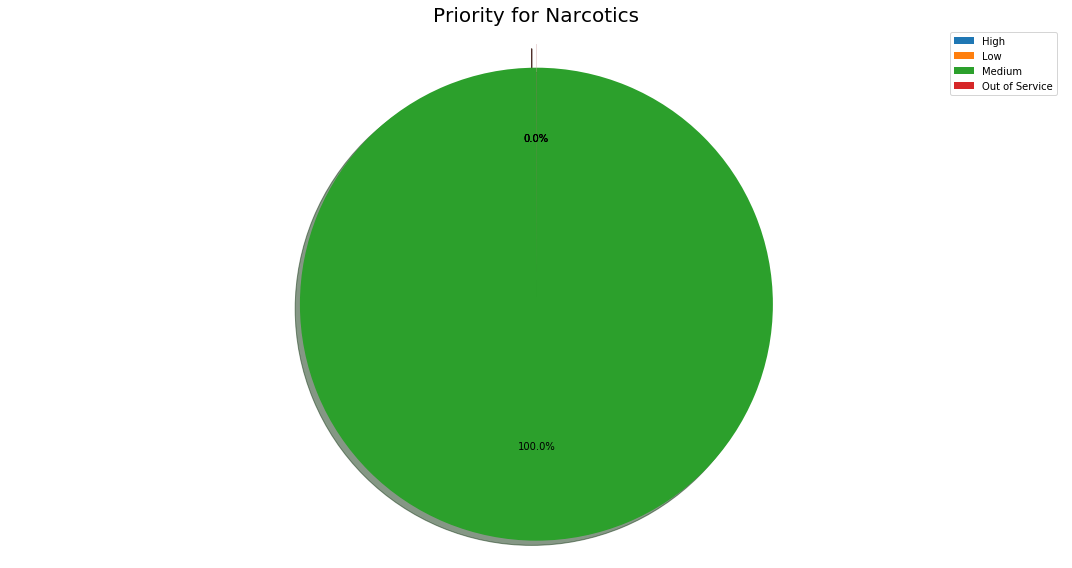

                callNumber       Size  Explode
priority                                      
High                     7   0.005455      0.0
Low                      3   0.002338      0.0
Medium              128312  99.984415      0.1
Out of Service          10   0.007792      0.0


In [11]:
# draw priority for Narcotics
DrawPieChart(narcotics_calls.groupby('priority').callNumber.count(), 'Priority for Narcotics')

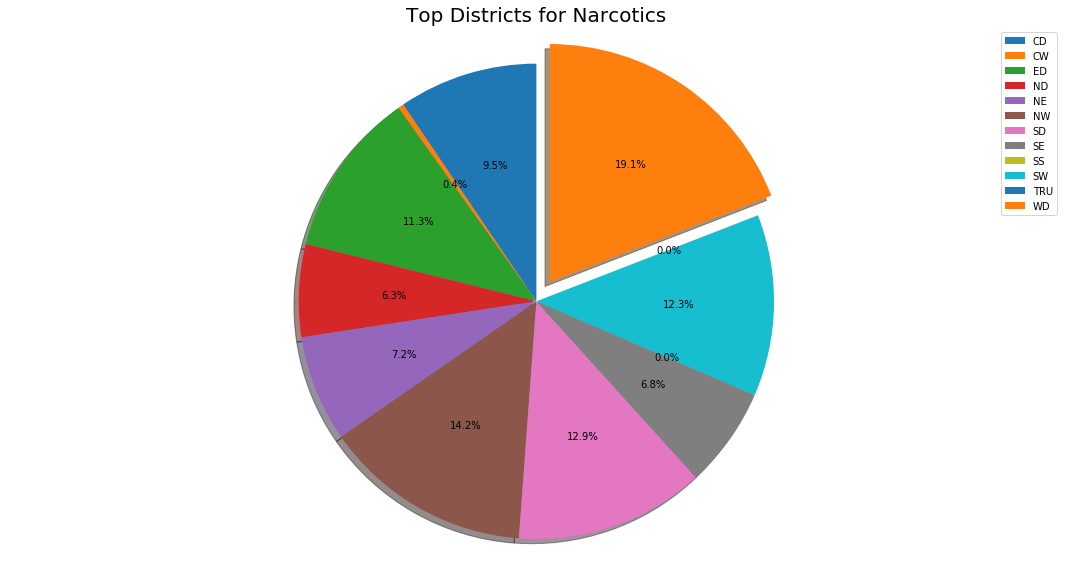

          callNumber       Size  Explode
district                                
CD             12149   9.466852      0.0
CW               507   0.395069      0.0
ED             14449  11.259078      0.0
ND              8092   6.305520      0.0
NE              9278   7.229686      0.0
NW             18189  14.173394      0.0
SD             16532  12.882212      0.0
SE              8760   6.826045      0.0
SS                11   0.008572      0.0
SW             15833  12.337531      0.0
TRU               14   0.010909      0.0
WD             24518  19.105134      0.1


In [13]:
# draw distict for Narcotics
DrawPieChart(narcotics_calls.groupby('district').callNumber.count(), \
             'Top Districts for Narcotics', 'narcotics-districts.png')

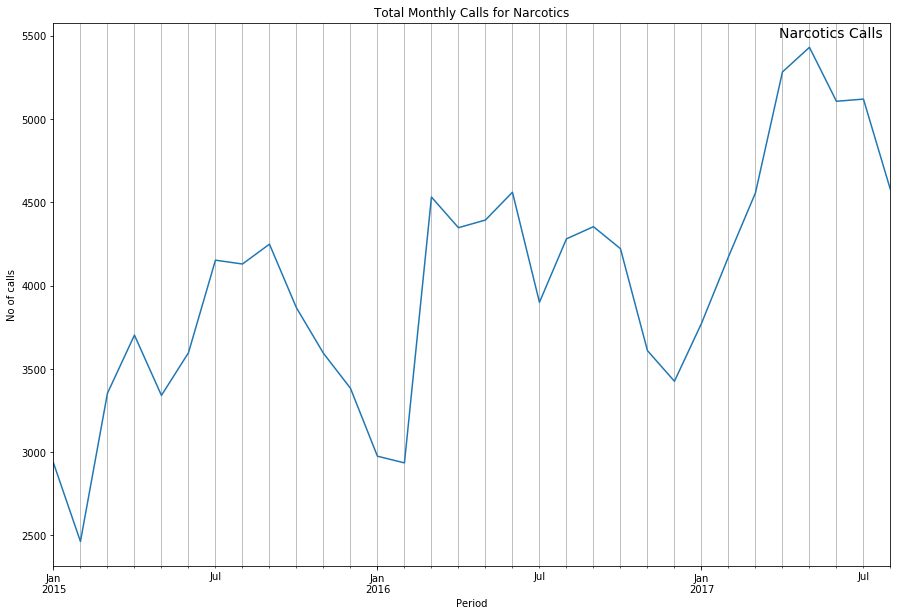

In [14]:
# monthly chart line chart for narcotics
ax = narcotics_calls.resample('M').callNumber.count().plot(figsize=(15,10), title="Total Monthly Calls for Narcotics")
SetChartProperties(ax, 'Period', 'No of calls', 'Narcotics Calls')
plt.savefig('narcotics-monthly.png', bbox_inches='tight')

<center><b>May 2017 is highest</b></center>

<b>Related news around peak time May to July 2017</b><br>
http://baltimore.cbslocal.com/2017/06/02/9-million-heroin-seized/<br>

http://baltimore.cbslocal.com/2017/05/25/md-state-police-makes-drug-bust-spanning-5-counties-including-delaware-130000-worth-of-drugs/<br>

http://www.baltimoresun.com/news/maryland/crime/bs-md-doctors-indicted-20170810-story.html

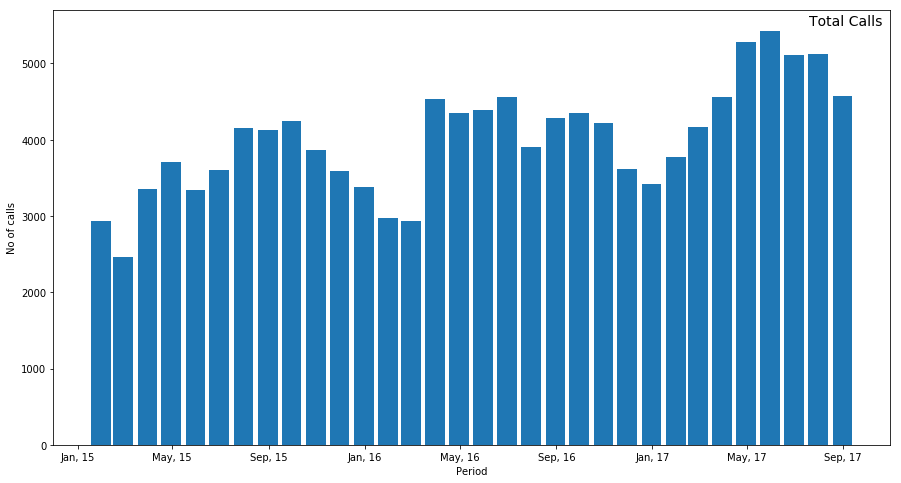

In [50]:
# monthly bar chart for narcotics
df = pd.Series.to_frame(narcotics_calls.resample('M').callNumber.count())
fig, ax = plt.subplots(figsize=(15, 8))
ax.xaxis.set_major_formatter(md.DateFormatter('%b, %y'))
ax.bar(df.index, df['callNumber'], width=25, align='center')
SetChartProperties(ax, 'Period', 'No of calls', 'Total Calls')


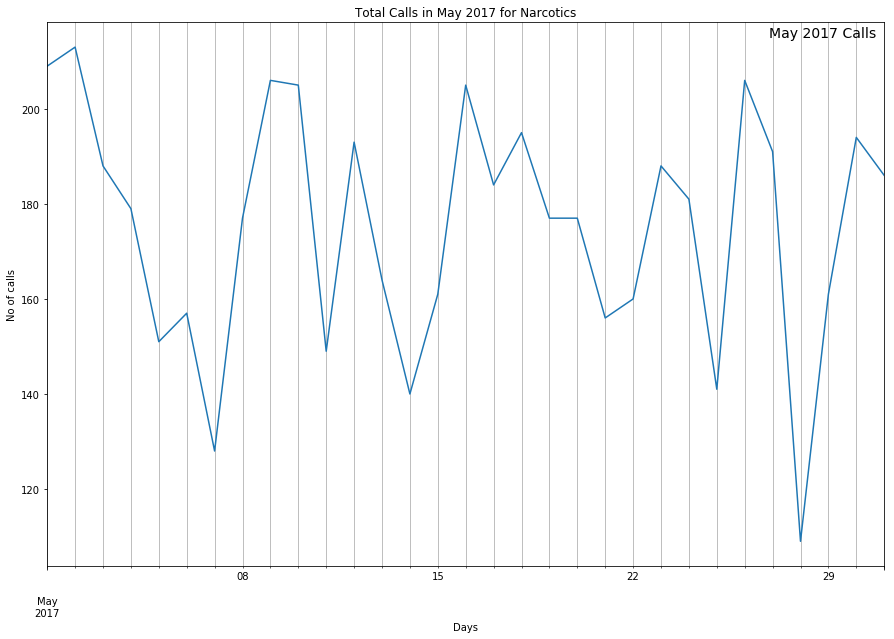

In [15]:
# May 2015 calls chart for assaults
ax = narcotics_calls['2017-05'].resample('D').callNumber.count().plot(figsize=(15,10), title="Total Calls in May 2017 for Narcotics")
SetChartProperties(ax, 'Days', 'No of calls', 'May 2017 Calls')
plt.savefig('narcotics-may2017.png', bbox_inches='tight')

<center><b>May 02 is highest</b></center>

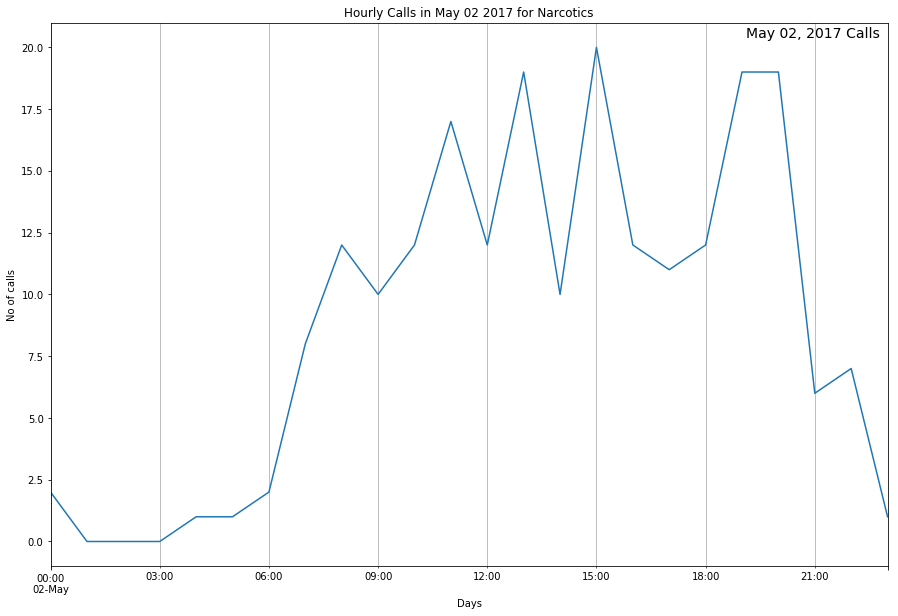

In [52]:
# May 10, 2015 calls chart for assaults
ax = narcotics_calls['2017-05-02'].resample('H').callNumber.count().plot(figsize=(15,10), title="Hourly Calls in May 02 2017 for Narcotics")
SetChartProperties(ax, 'Days', 'No of calls', 'May 02, 2017 Calls')

In [17]:
# create chart for two year compariason
narcotics2015 = narcotics_calls['2015'].resample('M').callNumber.count().reset_index()
narcotics2015['month'] = narcotics2015['callDateTime']
narcotics2015['month'] = narcotics2015['month'].apply(lambda x: x.month)
narcotics2015.drop('callDateTime', axis=1, inplace=True)
narcotics2015.columns = ['2015', 'month']

narcotics2016 = narcotics_calls['2016'].resample('M').callNumber.count().reset_index()
narcotics2016['month'] = narcotics2016['callDateTime']
narcotics2016['month'] = narcotics2016['month'].apply(lambda x: x.month)
narcotics2016.drop('callDateTime', axis=1, inplace=True)
narcotics2016.columns = ['2016', 'month']

mergenarcotics = pd.merge(narcotics2015, narcotics2016)
mergenarcotics.set_index('month', inplace=True)

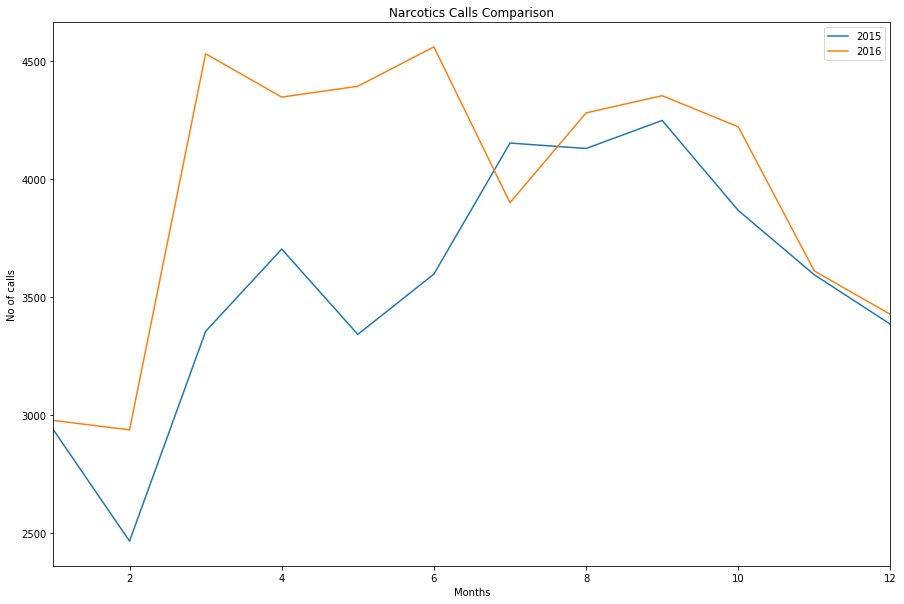

In [18]:
# draw a chart
ax = mergenarcotics.plot(figsize=(15,10), title="Narcotics Calls Comparison")
SetChartProperties(ax, 'Months', 'No of calls', '')
plt.savefig('narcotics-20152016.png', bbox_inches='tight')